### Assignment 2 - EMPIRICAL CLASSIFICATION STUDY: NAIVE BAYES VS LOGISTIC REGRESSION

**Group information**
* **Group number**: D2_6
* **Group member name:** Fredj Kharroubi
* **Student number:** 300160643

**1. Objective:**

The primary goal of this assignment is to train multi-class classification models, namely Logistic Regression and Naive Bayes, using one of the suggested datasets. 

The selected dataset for this assignemnt is the *16 personalities* dataset which comprises:

* **60 000 entries/rows:** each representing an individual's responses to the personality test, including the header.
* **60 features:** corresponding to the questions asked in the test, designed to capture various aspects of an individual’s personality.
* **16 unique personality types:** which are the classes into which the responses are categorized.

Example questions include “You regularly make new friends” and “You spend a lot of your free time exploring various random topics that pique your interest”.
The responses are numerically encoded to reflect the degree of agreement or disagreement on a scale from -3 (Fully Disagree) to 3 (Fully Agree), aiding in quantifying the sentiment behind each answer.

**The goal is to train two accurate models for predicting personality types, employing Naive Bayes and Logistic Regression.**


I find this dataset interesting and appreciate the significant effort to create and maintain it. The features are somewhat complex as each has seven possible values. Furthermore, there are a total of 16 distinct personalities/labels. Despite having 60,000 entries, I doubt that both models can achieve high precision percentages during testing and evaluation, or, at least, that's my prediction.

**The *16 personalities* dataset**

The Knapsack dataset can be obtained from Kaggle, courtesy of ANSHUL MEHTA, at the following link: https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt

The raw representation of the dataset can also be obtained at the following link: https://raw.githubusercontent.com/fredjkhar/supervised-learning/main/data/16P.csv

The csv file comes with a text file used to map the 16 personalities, and can be visualized at the following link: https://raw.githubusercontent.com/fredjkhar/supervised-learning/main/data/16p-Mapping.txt

Note that I will not be using the text file, as it is not needed for models training.

**2. Feature Engineering**

The dataset’s 60 features cover a broad behavioral spectrum, holding potential for insightful personality analysis. However, it is crucial to highlight that the responses are synthetic, as stated by ANSHUL MEHTA, the dataset’s owner and curator. This fact implies that, despite the comprehensiveness of the features, they might not yield precise personality evaluations. Nonetheless, given my limited background in psychology, such metrics might not be exceedingly helpful to me. Instead, I plan to depend solely on the testing phase to evaluate the prediction accuracy of the two trained models, which will be discussed later in the assignment.

Diving deeper into the features, I noticed that some questions might be subject to individual interpretation. For example, the question “You like books and movies that make you come up with your own interpretation of the ending” could be perceived differently or may be irrelevant to some. Personally, I find this question challenging to answer as I am selective about movies and rarely read books. Does this mean I should skip this question?

Additionally, the use of a numerical scale to represent agreement or disagreement could introduce some imprecisions. The distinctions between “slightly agree” and “partially agree,” for instance, might not be clear to everyone. However, converting responses to a numerical format is advantageous, as it allows us to employ empirical data in model development, predicting personality types based on responses. Even if the predictions are not 100% precise, it is acceptable given that psychology is inherently subjective, relying on interpretations and analyses that are not always exact.

**3. Attribute encoding**



**a. Encoding Approaches:**

One-hot encoding **[1]**: This technique transforms discrete categorical values into a binary representation, where each category is represented by a unique binary vector with a single '1' and the rest '0's. This is useful for algorithms that work better with continuous  data.
Discretization **[2]**: This technique transforms continuous values into discrete bins/chunks. This can be useful for algorithms that work better with categorical data.

The Scikit-learn package indeed provides a variety of encoding techniques, which I will be employing to prepare the data for the classifiers.

**b. Logistic Regression:**

The Scikit-learn's Logistic Regression implementation requires numerical input, but it can handle both continuous and discrete/categorical data. The features in the dataset are Likert scale responses, which are ordinal in nature and already in a numerical format, so they are compatible with Logistic Regression as-is.
The target "personality" column is categorical but text-based and will need to be encoded. Label Encoding **[3]** will be used to convert each unique string value to a unique integer.

**c. Naive Bayes:**

For this assignment, I will be using the CategoricalNB classifier as it is designed to handle categorical data. However, it expects the input values to be non-negative integers.
The features in the 16 personalities dataset include negative numbers, which are incompatible with CategoricalNB. A simple shifting technique will be applied to ensure all feature values are non-negative. This will involve adding a constant value to all feature values to eliminate negative numbers while maintaining the ordinal relationships between responses.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**4. Models**

**4.1 Pretreatment**

Before proceeding with the definition of each model, let us initiate the pretreatment step. 

In [2]:
url_data = "https://raw.githubusercontent.com/fredjkhar/supervised-learning/main/data/16P.csv"

dataset = pd.read_csv(url_data, encoding='cp1252') # reading the dataset fails with utf-8 encoding
dataset = dataset.dropna()

dataset.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


The dataset comprises 62 columns. We will eliminate the initial column, Response Id, as it is unnecessary. Additionally, we will rename the features to enhance readability and maintain a more generic nomenclature, with the option to reverse these changes in the future if necessary.

In [3]:
dataset = dataset.drop(columns=['Response Id'])

dataset_columns = dataset.columns.tolist()

for i in range(60): dataset.rename(columns={dataset_columns[i]: 'F' + str(i + 1)}, inplace=True)

dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F52,F53,F54,F55,F56,F57,F58,F59,F60,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ


**4.2 Logistic Regression and Dataset**

Logistic regression requires labels to be represented in numerical format. We distinguish 16 unique labels as can be seen below:

In [4]:
print(dataset['Personality'].unique())

print(len(dataset['Personality'].unique()))

['ENFP' 'ISFP' 'INFJ' 'ISTP' 'ENFJ' 'INTJ' 'ENTJ' 'ESFP' 'INFP' 'INTP'
 'ISTJ' 'ENTP' 'ISFJ' 'ESTJ' 'ESTP' 'ESFJ']
16


We proceed with using the Label Encoding technique to convert the text-based labels to numerical format:

In [5]:
# REFERENCE [3]
label_encoder = LabelEncoder() 
lr_dataset = dataset.copy()

lr_dataset['Personality']= label_encoder.fit_transform(lr_dataset['Personality'])

print(lr_dataset['Personality'].unique())

print(len(lr_dataset['Personality'].unique()))

[ 1 13  8 15  0 10  2  5  9 11 14  3 12  6  7  4]
16


We now define the Logistic Regression classifier:

In [6]:
# Reference: [4]

# max_iter=10000: Maximum number of iterations taken to converge
# n_jobs=-1: Use all available CPU cores for parallel computation
# multi_class='multinomial': Apply a multinomial loss fit when there are multiple classes
# tol=1e-10: Convergence tolerance; algorithm stops when loss is within this range of the previous loss

logreg = LogisticRegression(max_iter=10000, n_jobs=-1, multi_class='multinomial', tol=1e-10, class_weight=None, solver='lbfgs')

**4.3 Naive Bayes and dataset**

We will be using categoricalNB as our classifier. It does not accept negative feature values. We will thus add a constant value to all feature values to eliminate negative numbers.

In [7]:
# Define the mapping (new value = old value + 3)
value_map = {
    -3: 0,
    -2: 1,
    -1: 2,
     0: 3,
     1: 4,
     2: 5,
     3: 6
}
nb_dataset = dataset.copy()
nb_dataset.replace(value_map, inplace=True) # replace values in the dataset using the mapping

nb_dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F52,F53,F54,F55,F56,F57,F58,F59,F60,Personality
0,3,3,3,3,3,4,4,3,3,3,...,3,3,3,2,3,3,3,3,3,ENFP
1,3,3,1,0,2,5,1,3,6,3,...,3,1,3,5,3,2,2,2,6,ISFP
2,3,3,5,3,2,5,3,3,4,3,...,3,5,3,5,2,3,4,5,4,INFJ
3,3,2,6,2,3,3,1,3,1,3,...,3,3,2,2,3,4,3,1,2,ISTP
4,3,3,2,3,5,2,1,3,4,3,...,3,4,3,5,3,4,2,5,2,ENFJ


Now that the dataset is ready, we can proceed with defining the categoricalNB classifier

In [8]:
# Reference: [5]

# min_categories=7: Minimum number of categories for a feature to be treated as a categorical variable
# alpha=1e-10: Additive smoothing parameter
# force_alpha=True: Force the addition of alpha to the smoothing parameter

cnb = CategoricalNB(min_categories=7, alpha=1e-10, force_alpha=True)

**5. Models training**

I will prepare the evaluation method that calculates the precision and recall in advance

In [9]:
# Reference: [6]
# Reference: [7]

def evaluate(y_pred, y_test):
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)

    # Calculating average precision and recall
    micro_precision = precision_score(y_test, y_pred, average='micro')
    micro_recall = recall_score(y_test, y_pred, average='micro')

    # Calculating average precision and recall
    macro_precision = precision_score(y_test, y_pred, average='macro')
    macro_recall = recall_score(y_test, y_pred, average='macro')

    # Printing the results
    print("Precision for each class:", precision)
    print("\nRecall for each class:", recall)
    print("\nAverage Micro Precision: {:.5f}".format(micro_precision))
    print("\nAverage Micro Recall: {:.5f}".format(micro_recall))
    print("\nAverage Macro Precision: {:.5f}".format(macro_precision))
    print("\nAverage Macro Recall: {:.5f}".format(macro_recall))
    
    return(micro_precision, micro_recall, macro_precision, macro_recall)
    

**5.1 Logistic regression**

In [10]:
# Reference: [8]

lr_X = lr_dataset.drop(columns=['Personality']) # feature columns
lr_Y = lr_dataset['Personality'] # target column

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_Y, test_size=0.25, random_state=16) # 4-to-1 train/test split

lr_y_pred = logreg.fit(lr_X_train, lr_y_train).predict(lr_X_test)

lr_micro_precision_1, lr_micro_recall_1, lr_macro_precision_1, lr_macro_recall_1 = evaluate(lr_y_pred, lr_y_test)

Precision for each class: [0.92459016 0.93475816 0.94797688 0.95842217 0.88123012 0.93376068
 0.93478261 0.92893401 0.93259669 0.90151515 0.875      0.91540785
 0.8987069  0.91099476 0.90889831 0.91851107]

Recall for each class: [0.92864984 0.92849162 0.94361335 0.94333683 0.87381703 0.95103373
 0.9475341  0.9423275  0.91938998 0.89762931 0.88754135 0.91448692
 0.90948746 0.91578947 0.89468196 0.90845771]

Average Micro Precision: 0.91900

Average Micro Recall: 0.91900

Average Macro Precision: 0.91913

Average Macro Recall: 0.91914


**5.2 Naive Bayes**

In [11]:
nb_X = nb_dataset.drop(columns=['Personality']) # feature columns
nb_Y = nb_dataset['Personality'] # target column
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_Y, test_size=0.25, random_state=16)

nb_y_pred = cnb.fit(nb_X_train, nb_y_train).predict(nb_X_test)

nb_micro_precision_1, nb_micro_recall_1, nb_macro_precision_1, nb_macro_recall_1 = evaluate(nb_y_pred, nb_y_test)

Precision for each class: [0.91416309 0.91422367 0.95265589 0.95978261 0.8540305  0.95159516
 0.9123506  0.91658291 0.91028446 0.9038674  0.85475444 0.8856305
 0.8835691  0.91157205 0.93002257 0.91133005]

Recall for each class: [0.935236   0.94078212 0.94936709 0.92654774 0.82439537 0.94124048
 0.96117524 0.9392379  0.90631808 0.88146552 0.90187431 0.91146881
 0.88549618 0.87894737 0.85922836 0.92039801]

Average Micro Precision: 0.90993

Average Micro Recall: 0.90993

Average Macro Precision: 0.91040

Average Macro Recall: 0.91020


**6 Additional model training**

**6.1 Logistic Regression**

**a. set class weight to balanced**

In [12]:
# Class weight is set to balanced to account for the imbalanced dataset instead of the default None
logreg = LogisticRegression(max_iter=10000, n_jobs=-1, multi_class='multinomial', tol=1e-10, solver='lbfgs', class_weight='balanced')
lr_y_pred = logreg.fit(lr_X_train, lr_y_train).predict(lr_X_test)

lr_micro_precision_2, lr_micro_recall_2, lr_macro_precision_2, lr_macro_recall_2 = evaluate(lr_y_pred, lr_y_test)

Precision for each class: [0.92459016 0.93475816 0.94907407 0.95842217 0.88123012 0.93376068
 0.93478261 0.92900609 0.93252212 0.90249187 0.87595212 0.91540785
 0.8987069  0.91099476 0.90899471 0.9186747 ]

Recall for each class: [0.92864984 0.92849162 0.94361335 0.94333683 0.87381703 0.95103373
 0.9475341  0.94335736 0.91830065 0.89762931 0.88754135 0.91448692
 0.90948746 0.91578947 0.89572471 0.91044776]

Average Micro Precision: 0.91920

Average Micro Recall: 0.91920

Average Macro Precision: 0.91934

Average Macro Recall: 0.91933


**b. set C (regularization strength) to 0.1**

In [13]:
# C is set to 0.1 to account for the (presumably) imbalanced dataset instead of the default 1.0
logreg = LogisticRegression(max_iter=10000, n_jobs=-1, multi_class='multinomial', solver='lbfgs', tol=1e-10, C=0.1)
lr_y_pred = logreg.fit(lr_X_train, lr_y_train).predict(lr_X_test)

lr_micro_precision_3, lr_micro_recall_3, lr_macro_precision_3, lr_macro_recall_3 = evaluate(lr_y_pred, lr_y_test)

Precision for each class: [0.92467249 0.93595506 0.94803695 0.95953142 0.88322718 0.93475936
 0.9357513  0.93089431 0.93267108 0.90249187 0.87704026 0.91549296
 0.8987069  0.91099476 0.91295117 0.9186747 ]

Recall for each class: [0.92974753 0.93072626 0.9447641  0.94543547 0.87486856 0.95103373
 0.9475341  0.94335736 0.9204793  0.89762931 0.88864388 0.91549296
 0.90948746 0.91578947 0.89676747 0.91044776]

Average Micro Precision: 0.92000

Average Micro Recall: 0.92000

Average Macro Precision: 0.92012

Average Macro Recall: 0.92014


**6.2 Naive Bayes**

**a. set alpha to 1e-3**

In [14]:
# alpha=1e-3 instead of 1e-10
cnb = CategoricalNB(min_categories=7, alpha=1e-3, force_alpha=True)
nb_y_pred = cnb.fit(nb_X_train, nb_y_train).predict(nb_X_test)

nb_micro_precision_2, nb_micro_recall_2, nb_macro_precision_2, nb_macro_recall_2 = evaluate(nb_y_pred, nb_y_test)

Precision for each class: [0.91416309 0.91521739 0.9527105  0.95978261 0.8540305  0.95159516
 0.9123506  0.91658291 0.91028446 0.9038674  0.85475444 0.8856305
 0.8835691  0.91266376 0.93002257 0.91133005]

Recall for each class: [0.935236   0.94078212 0.95051784 0.92654774 0.82439537 0.94124048
 0.96117524 0.9392379  0.90631808 0.88146552 0.90187431 0.91146881
 0.88549618 0.88       0.85922836 0.92039801]

Average Micro Precision: 0.91007

Average Micro Recall: 0.91007

Average Macro Precision: 0.91053

Average Macro Recall: 0.91034


**b. set fit_prior to false**

In [15]:
# fit_prior=False instead of the default True
cnb = CategoricalNB(min_categories=7, alpha=1e-10, force_alpha=True, fit_prior=False)
nb_y_pred = cnb.fit(nb_X_train, nb_y_train).predict(nb_X_test)

nb_micro_precision_3, nb_micro_recall_3, nb_macro_precision_3, nb_macro_recall_3 = evaluate(nb_y_pred, nb_y_test)

Precision for each class: [0.91416309 0.91521739 0.95265589 0.95978261 0.85032538 0.95154185
 0.9123506  0.91658291 0.91128149 0.90486726 0.85519412 0.88487805
 0.8835691  0.91256831 0.93002257 0.91060904]

Recall for each class: [0.935236   0.94078212 0.94936709 0.92654774 0.82439537 0.94015234
 0.96117524 0.9392379  0.90631808 0.88146552 0.8985667  0.91247485
 0.88549618 0.87894737 0.85922836 0.92238806]

Average Micro Precision: 0.90987

Average Micro Recall: 0.90987

Average Macro Precision: 0.91035

Average Macro Recall: 0.91011


**7. Data analysis and comparison**

**a. Macro and Micro LB precision averages**

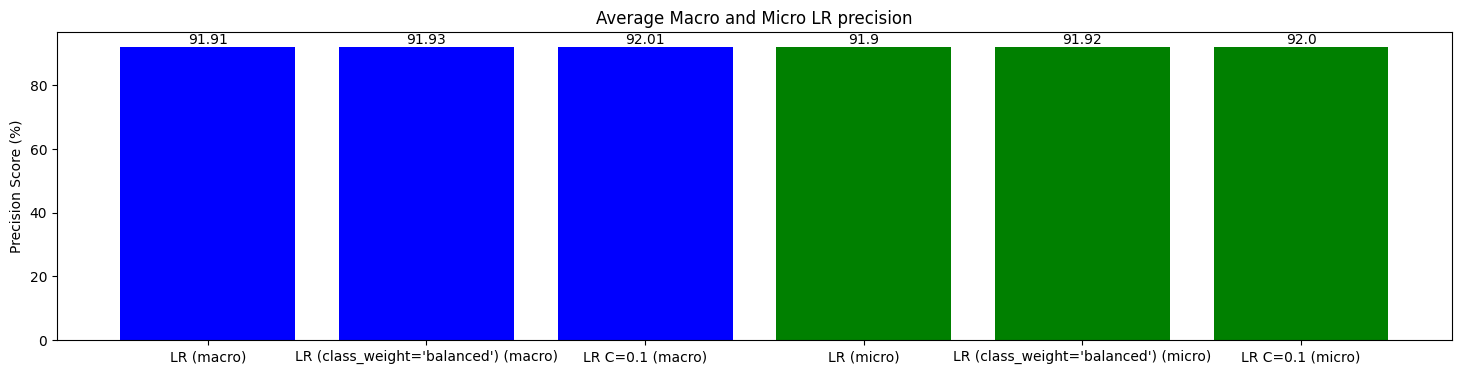

In [16]:


algorithms = ["LR (macro)", "LR (class_weight='balanced') (macro)", "LR C=0.1 (macro)", 
              "LR (micro)", "LR (class_weight='balanced') (micro)", "LR C=0.1 (micro)", ]
values = [lr_macro_precision_1, lr_macro_precision_2, lr_macro_precision_3, lr_micro_precision_1, lr_micro_precision_2, lr_micro_precision_3]

for i in range(len(values)):
    values[i] = round(values[i]*100, 2)

plt.figure(figsize=(18,4))   
bars = plt.bar(algorithms, values, color=["blue", "blue", "blue", "green", "green", "green"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.ylabel("Precision Score (%)")
plt.title("Average Macro and Micro LR precision")
plt.show()

**b. Macro and Micro LB recall averages**

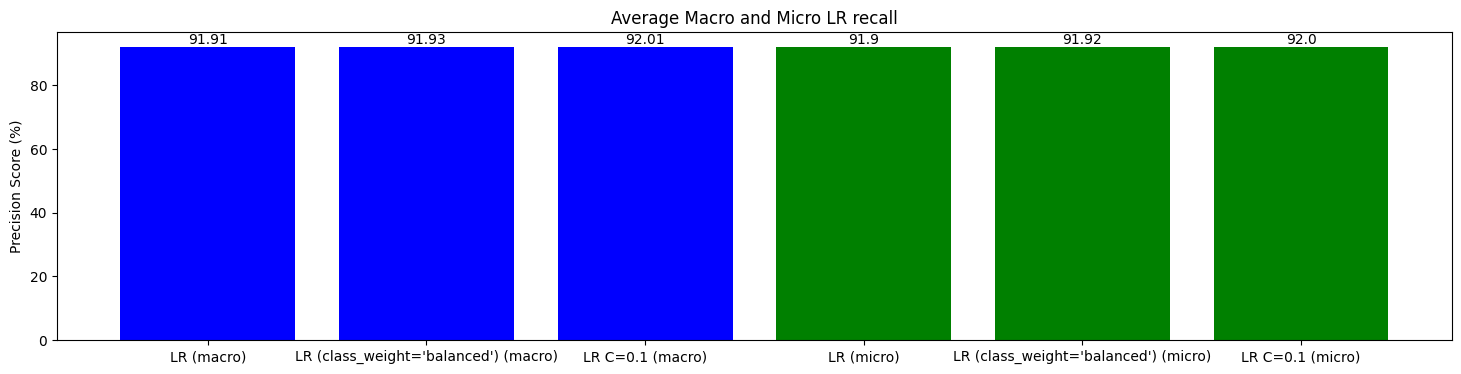

In [17]:
algorithms = ["LR (macro)", "LR (class_weight='balanced') (macro)", "LR C=0.1 (macro)", 
              "LR (micro)", "LR (class_weight='balanced') (micro)", "LR C=0.1 (micro)", ]
values = [lr_macro_recall_1, lr_macro_recall_2, lr_macro_recall_3, lr_micro_recall_1, lr_micro_recall_2, lr_micro_recall_3]

for i in range(len(values)):
    values[i] = round(values[i]*100, 2)

plt.figure(figsize=(18,4))   
bars = plt.bar(algorithms, values, color=["blue", "blue", "blue", "green", "green", "green"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.ylabel("Precision Score (%)")
plt.title("Average Macro and Micro LR recall")
plt.show()

**c. Macro and Micro CNB precision averages**

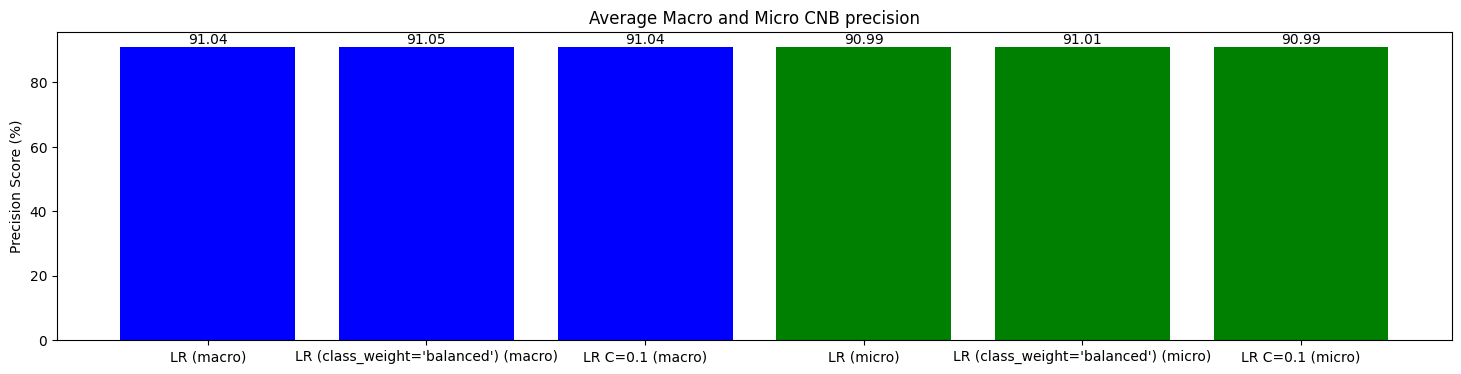

In [18]:
algorithms = ["LR (macro)", "LR (class_weight='balanced') (macro)", "LR C=0.1 (macro)", 
              "LR (micro)", "LR (class_weight='balanced') (micro)", "LR C=0.1 (micro)", ]
values = [nb_macro_precision_1, nb_macro_precision_2, nb_macro_precision_3, nb_micro_precision_1, nb_micro_precision_2, nb_micro_precision_3]

for i in range(len(values)):
    values[i] = round(values[i]*100, 2)

plt.figure(figsize=(18,4))   
bars = plt.bar(algorithms, values, color=["blue", "blue", "blue", "green", "green", "green"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.ylabel("Precision Score (%)")
plt.title("Average Macro and Micro CNB precision")
plt.show()

**d. Macro and Micro CNB recall averages**

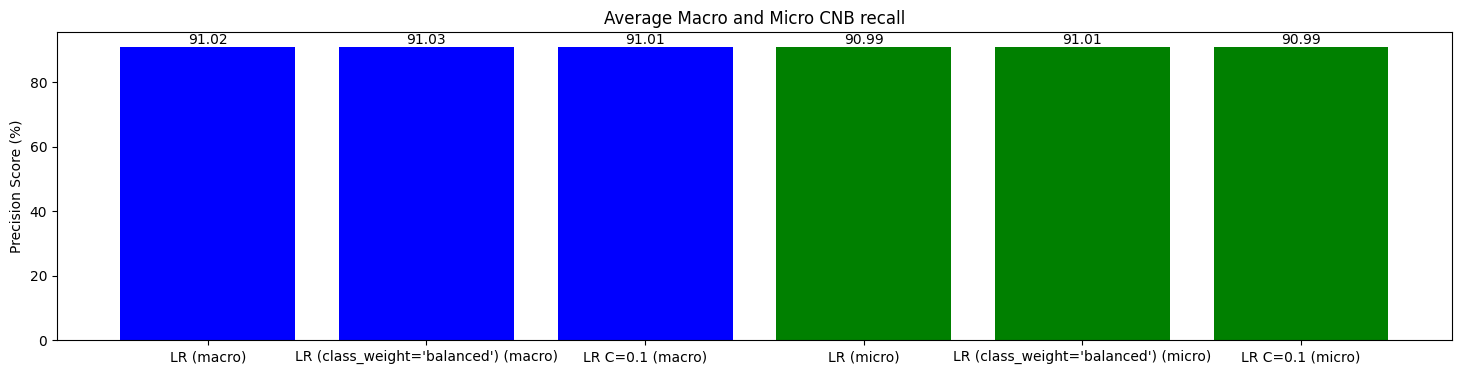

In [19]:
algorithms = ["LR (macro)", "LR (class_weight='balanced') (macro)", "LR C=0.1 (macro)", 
              "LR (micro)", "LR (class_weight='balanced') (micro)", "LR C=0.1 (micro)", ]
values = [nb_macro_recall_1, nb_macro_recall_2, nb_macro_recall_3, nb_micro_recall_1, nb_micro_recall_2, nb_micro_recall_3]

for i in range(len(values)):
    values[i] = round(values[i]*100, 2)

plt.figure(figsize=(18,4))   
bars = plt.bar(algorithms, values, color=["blue", "blue", "blue", "green", "green", "green"])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.ylabel("Precision Score (%)")
plt.title("Average Macro and Micro CNB recall")
plt.show()

**e. Discussion**

**Average Macro and Micro LR Precision:**

* The precision scores for both Macro and Micro in Logistic Regression (LR) range from 91.9% to 92.0%.
* The difference in accuracy across various methods (balanced with class weights and regularisation parameter being set to 0.1) is negligible.
* Balancing classes in Logistic Regression has minimal impact on precision, however using the regularization parameter C=0.1 appears to marginally enhance macro precision.



**Average Macro and Micro LR Recall:**
* Suprisingly, the recall and precision rates of LR are the same. I find it difficult to explain, but this could be due to the fact that the classifier's errors are distributed symmetrically between false positives and false negatives. 

**Average Macro and Micro CNB Precision:**
* The precision results for Categorical Naive Bayes (CNB) display slightly lower scores than those of LR, ranging from 90.99% to 91.05%.
* As with LR, there is minimal variation in precision between different hyperparameter settings.
* Balancing the class weights in CNB does not greatly change the precision, although it contributes to a slightly higher percentage.

**Average Macro and Micro CNB Recall:**
* On average, the CNB recall scores range from 90.99% to 91.03%, with minimal variation between various hyperparameter settings.

**The dataset might have a relatively balanced distribution of classes, as class-weight balancing does not lead to significant changes in either precision or recall.**

**Logistic Regression may be better for the dataset than Categorical Naive Bayes due to slightly better precision scores. The data distribution and feature relationships may be more linear, which favours LR.**

### I can't draw clear conclusions, as the various hyperparameter configurations' impact on the two classifiers was undecisive. Moreover, the precision and recall metrics were showing consistency across all evaluated categories. I also acknowledge my limited in-depth understanding of said classifiers. Nonetheless, it's clear that the Logistic Regression (LR) and Categorical Naive Bayes (CNB) have performed impressively, achieving precision scores above 90% on a consistent basis. Importantly, LR demonstrated higher precision than CNB.

### In my view, the two classifiers effectively trained the two models to balance between recall and precision. If this is the case, it suggests that the resulting models have been successful.




**8. References**

[1] Brightspace. "ENCODAGE ONE-HOT, Slide 7, Lecture Automne2020-CSI4506-Module4-Video3-AMS-Partie2-Attributs". Retrieved on October 23th 2023 from :
https://uottawa.brightspace.com/d2l/le/content/392262/viewContent/5563920/View

[2] Brightspace. "DISCRETISATION, Slide 8. Lecture Automne2020-CSI4506-Module4-Video3-AMS-Partie2-Attributs". Retrieved on October 23th 2023 from :
https://uottawa.brightspace.com/d2l/le/content/392262/viewContent/5563920/View

[3] Scikit-learn. "sklearn.preprocessing.LabelEncoder". Retrieved on October 24th 2023 from :
https://uottawa.brightspace.com/d2l/le/content/392262/viewContent/5563920/View

[4] Scikit-learn. "sklearn.linear_model.LogisticRegression". Retrieved on October 23th 2023 from :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

[5] Scikit-learn. "sklearn.naive_bayes.CategoricalNB". Retrieved on October 23th 2023 from :
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html

[6] Scikit-learn. "sklearn.metrics.precision_score". Retrieved on October 23th 2023 from :
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

[7] Scikit-learn. "sklearn.metrics.recall_score". Retrieved on October 23th 2023 from :
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

[8] Scikit-learn. "sklearn.model_selection.train_test_split". Retrieved on October 23th 2023 from :
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[9] Colab. "Charts in Colaboratory - Bar Plots". Retrieved on October 23th 2023 from :
https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=sIZLTZ0pdo0Z